In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv("../../Own_model/data_csv/customer_churn.csv").drop(columns=['RowNumber','CustomerId','Surname'])

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True).astype(int)

In [17]:
cols = df.columns.tolist()
cols.append(cols.pop(cols.index('Exited')))
df = df[cols]

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0,1,1,1,101348,0,0,0,1
1,608,41,1,83807,1,0,1,112542,0,1,0,0
2,502,42,8,159660,3,1,0,113931,0,0,0,1
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1,0
9996,516,35,10,57369,1,1,1,101699,0,0,1,0
9997,709,36,7,0,1,0,1,42085,0,0,0,1
9998,772,42,3,75075,2,1,0,92888,1,0,1,1


X = df.drop(columns='Exited')
Y = df.Exited

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                   random_state=1)

In [21]:
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

---
## Model creation

In [62]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=11))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

### Model compilation

In [103]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [104]:
history = model.fit(x_train_scaled, y_train, epochs=60, validation_split=0.2)

Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8584 - loss: 0.3450 - val_accuracy: 0.8569 - val_loss: 0.3354
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8634 - loss: 0.3324 - val_accuracy: 0.8544 - val_loss: 0.3365
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8678 - loss: 0.3360 - val_accuracy: 0.8581 - val_loss: 0.3352
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8636 - loss: 0.3361 - val_accuracy: 0.8581 - val_loss: 0.3351
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8654 - loss: 0.3336 - val_accuracy: 0.8575 - val_loss: 0.3354
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8641 - loss: 0.3411 - val_accuracy: 0.8556 - val_loss: 0.3356
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8648 - loss: 0.3350 - val_accuracy: 0.8556 - val_loss: 0.3357
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8575 - loss: 0.3496 - val_accuracy: 0.

In [105]:
model.layers[0].get_weights()

[array([[-0.04513607,  0.05624509, -0.05498946],
        [ 1.0379744 ,  0.7426271 ,  0.71235675],
        [ 0.11484817,  0.01965548, -0.01264726],
        [ 0.00854978,  0.49817032, -0.2641877 ],
        [-0.07523037,  1.4447764 , -1.8089901 ],
        [ 0.02883138, -0.07716125, -0.02213968],
        [ 0.32743648, -0.2039476 , -0.24249928],
        [-0.02213702,  0.01098003,  0.02700292],
        [-0.00450837, -0.1117704 ,  0.28843558],
        [ 0.05452712,  0.08764715,  0.00499052],
        [-0.01797015, -0.11550387, -0.12072843]], dtype=float32),
 array([-1.8708282 ,  0.07472443,  0.47282743], dtype=float32)]

In [106]:
model.layers[1].get_weights()

[array([[-0.7141474 , -2.3749    ],
        [-0.5993024 ,  0.9717547 ],
        [-0.12673676,  0.9957227 ]], dtype=float32),
 array([ 0.       , -0.6338338], dtype=float32)]

In [107]:
predictions = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [108]:
predictions

array([[0.03089226],
       [0.09411724],
       [0.03270594],
       ...,
       [0.02500844],
       [0.02500844],
       [0.53692865]], dtype=float32)

In [109]:
final_prediction = np.where(predictions >= 0.5, 1, 0)

In [110]:
final_prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [111]:
accuracy_score(y_test, final_prediction)

0.8605

---
## Visulization

In [120]:
type(history.history)

dict

In [121]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

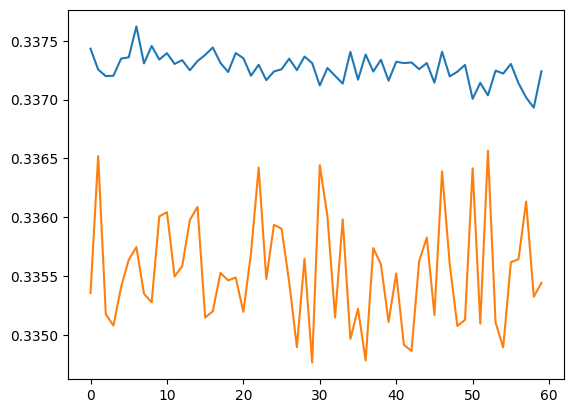

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

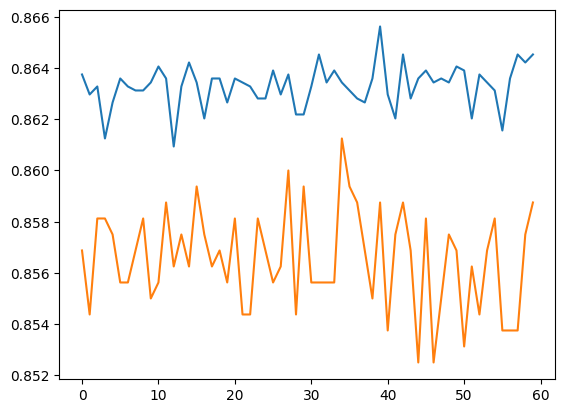

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])